In [1]:
from pathlib import Path
import numpy as np, pandas as pd
from skimage.feature import hog
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append("utils")
import ds_utils as DU
print("DU loaded from:", DU.__file__)
import random
from PIL import Image

DU loaded from: C:\Users\Pars\Desktop\my computer\taha\zohram\Ziraxa\project\ML\FarsiOCR\model\utils\ds_utils.py


In [2]:
repo = Path.cwd().parents[0]
df_tr = DU.load_split_csv(repo/"Dataset/Create Dataset/train.csv")
df_va = DU.load_split_csv(repo/"Dataset/Create Dataset/val.csv")
Xtr, ytr = DU.load_image_and_labels(df_tr, repo)
Xva, yva = DU.load_image_and_labels(df_va, repo)

Xtr.shape, ytr.shape

((1472, 64, 64), (1472,))

In [3]:
def extract_hog(batch, ppc = (8, 8), cpb = (2,2), ori = 9):
    feats = []
    for img in batch:
        f = hog(img, orientations = ori, pixels_per_cell = ppc, cells_per_block = cpb, block_norm = "L2-Hys", feature_vector = True)
        feats.append(f)
    return np.array(feats)

Xtr_h = extract_hog(Xtr)
Xva_h = extract_hog(Xva)

Xtr_h.shape, Xva_h.shape

((1472, 1764), (160, 1764))

In [4]:
pipe = make_pipeline(StandardScaler(with_mean=False), LinearSVC())
param = {"linearsvc__C":[0.1, 1, 3, 10, 100]}
grid = GridSearchCV(pipe, param, cv = 3, n_jobs = 1, verbose = 1)
grid.fit(Xtr_h, ytr)
grid.best_params_, grid.best_score_

Fitting 3 folds for each of 5 candidates, totalling 15 fits


C:\Users\Pars\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Pars\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Pars\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Pars\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Pars\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.w

({'linearsvc__C': 0.1}, 0.793486844839769)

In [5]:
y_pred = grid.predict(Xva_h)
m = DU.metrics(yva, y_pred)
print(f"VAL: acc={m['acc']:.4f}  f1_macro={m['f1_macro']:.4f}")
print(m['report'])



VAL: acc=0.8313  f1_macro=0.8331
              precision    recall  f1-score   support

        Alef     1.0000    0.8000    0.8889         5
          Be     0.8000    0.8000    0.8000         5
          Pe     0.8000    0.8000    0.8000         5
          Te     0.6667    0.8000    0.7273         5
          Se     0.7500    0.6000    0.6667         5
         Jim     0.4000    0.4000    0.4000         5
         Che     0.5000    0.4000    0.4444         5
          He     0.8333    1.0000    0.9091         5
         Khe     1.0000    0.8000    0.8889         5
         Dal     1.0000    1.0000    1.0000         5
         Zal     0.8333    1.0000    0.9091         5
          Re     1.0000    0.8000    0.8889         5
          Ze     0.8000    0.8000    0.8000         5
         Zhe     0.8000    0.8000    0.8000         5
         Sin     1.0000    1.0000    1.0000         5
        Shin     1.0000    1.0000    1.0000         5
         Sad     1.0000    1.0000    1.0000     

In [6]:
knn = make_pipeline(StandardScaler(with_mean=False), KNeighborsClassifier(n_neighbors=5))
knn.fit(Xtr_h, ytr)
yp = knn.predict(Xva_h)

m = DU.metrics(yva, yp)
print(f"KNN VAL: acc={m['acc']:.4f}  f1_macro={m['f1_macro']:.4f}")
print(m['report'])

KNN VAL: acc=0.7000  f1_macro=0.6901
              precision    recall  f1-score   support

        Alef     1.0000    0.8000    0.8889         5
          Be     0.7500    0.6000    0.6667         5
          Pe     0.6667    0.8000    0.7273         5
          Te     1.0000    0.8000    0.8889         5
          Se     0.5714    0.8000    0.6667         5
         Jim     0.2727    0.6000    0.3750         5
         Che     0.0000    0.0000    0.0000         5
          He     1.0000    0.2000    0.3333         5
         Khe     0.6667    0.4000    0.5000         5
         Dal     0.8333    1.0000    0.9091         5
         Zal     1.0000    1.0000    1.0000         5
          Re     0.6667    0.8000    0.7273         5
          Ze     0.5000    0.4000    0.4444         5
         Zhe     0.7143    1.0000    0.8333         5
         Sin     1.0000    0.8000    0.8889         5
        Shin     0.8333    1.0000    0.9091         5
         Sad     0.7143    1.0000    0.8333 

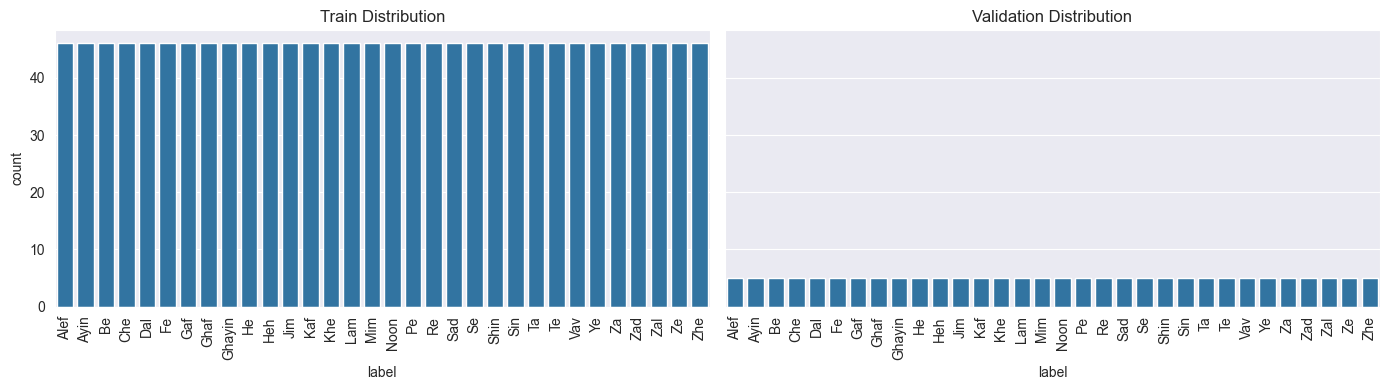

In [7]:
df_train = pd.read_csv(repo / "Dataset" / "Create Dataset" / "train.csv")
df_val   = pd.read_csv(repo / "Dataset" / "Create Dataset" / "val.csv")

fig, axes = plt.subplots(1, 2, figsize=(14, 4), sharey=True)
sns.countplot(x="label", data=df_train, order=sorted(df_train["label"].unique()), ax=axes[0])
axes[0].set_title("Train Distribution")
axes[0].tick_params(axis='x', rotation=90)

sns.countplot(x="label", data=df_val, order=sorted(df_val["label"].unique()), ax=axes[1])
axes[1].set_title("Validation Distribution")
axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

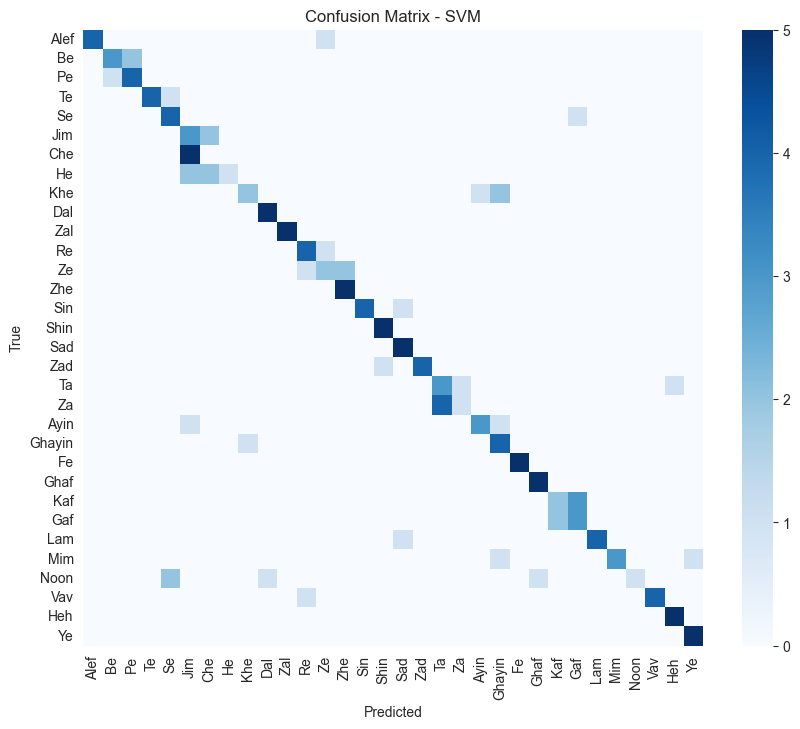

In [8]:
cm = m["cm"]
labels = DU.labels_

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=False, fmt="d", cmap="Blues",
            xticklabels=labels, yticklabels=labels, cbar=True)
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

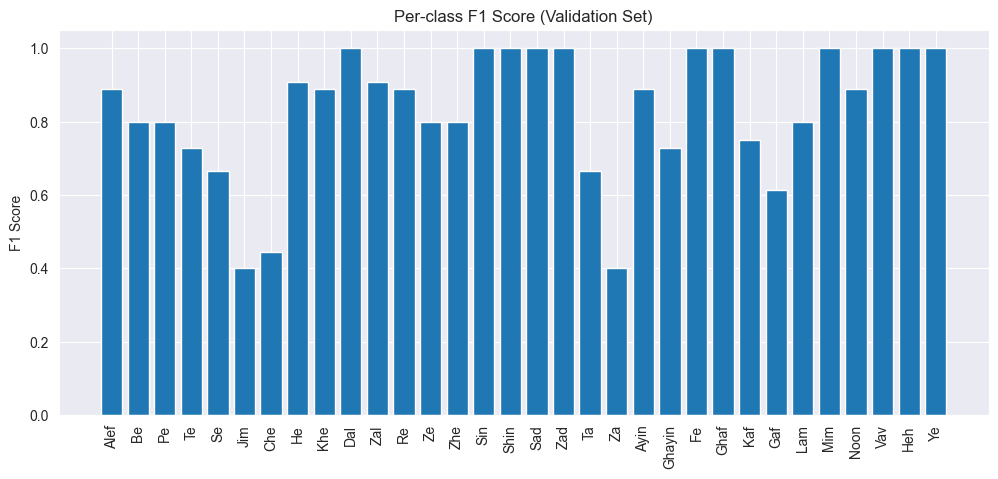

In [13]:
prec, rec, f1, _ = precision_recall_fscore_support(yva, y_pred, labels=range(len(DU.labels_)))

plt.figure(figsize=(12,5))
plt.bar(range(len(DU.labels_)), f1, tick_label=DU.labels_)
plt.xticks(rotation=90)
plt.title("Per-class F1 Score (Validation Set)")
plt.ylabel("F1 Score")
plt.show()

تعداد نمونه‌های اشتباه: 27


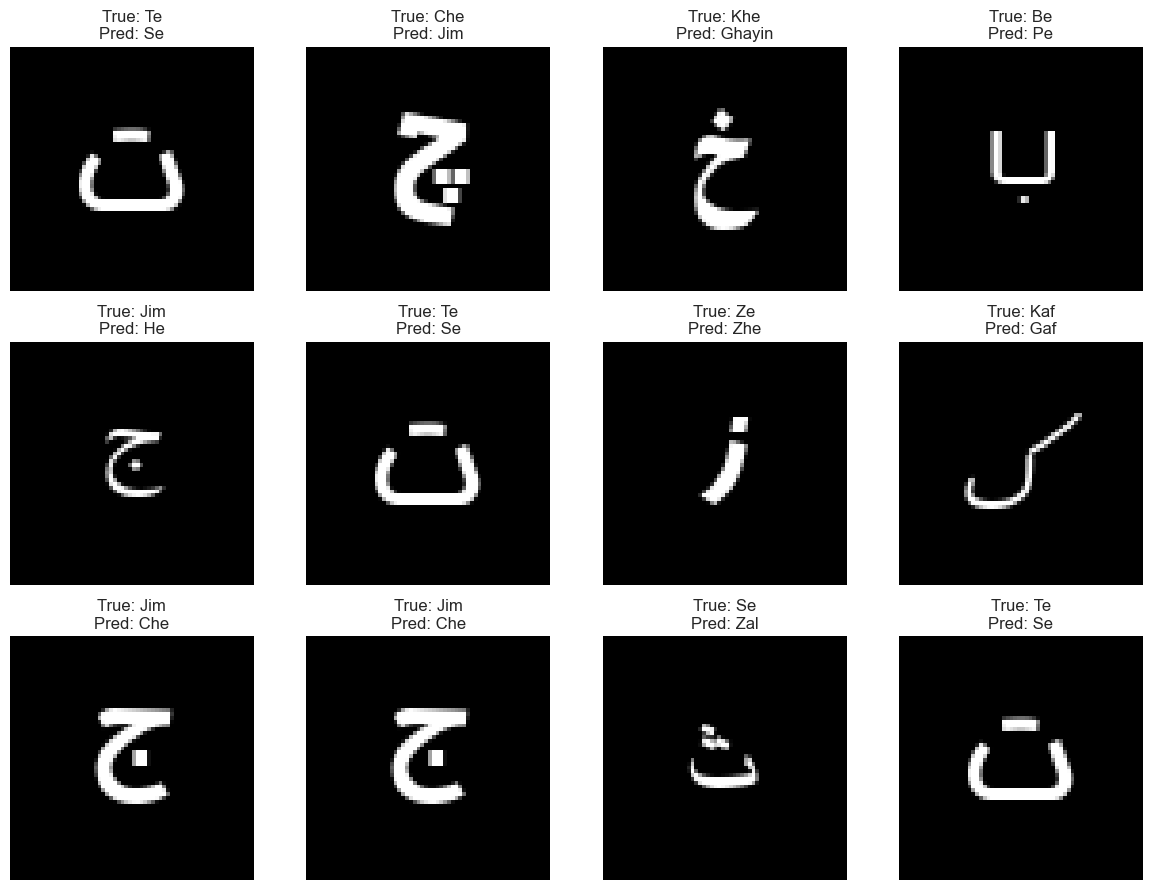

In [16]:
wrong_idx = [i for i,(yt,yp) in enumerate(zip(yva, y_pred)) if yt != yp]

print("تعداد نمونه‌های اشتباه:", len(wrong_idx))

# نمایش 12 تا نمونه‌ی اشتباه
fig, axes = plt.subplots(3, 4, figsize=(12, 9))
for ax in axes.ravel():
    if not wrong_idx: break
    i = random.choice(wrong_idx)
    img = Xva[i]
    ax.imshow(img, cmap="gray")
    ax.set_title(f"True: {DU.idx2label[yva[i]]}\nPred: {DU.idx2label[y_pred[i]]}")
    ax.axis("off")
plt.tight_layout()
plt.show()


SVM VAL: acc=0.8313  f1_macro=0.8331
              precision    recall  f1-score   support

        Alef     1.0000    0.8000    0.8889         5
          Be     0.8000    0.8000    0.8000         5
          Pe     0.8000    0.8000    0.8000         5
          Te     0.6667    0.8000    0.7273         5
          Se     0.7500    0.6000    0.6667         5
         Jim     0.4000    0.4000    0.4000         5
         Che     0.5000    0.4000    0.4444         5
          He     0.8333    1.0000    0.9091         5
         Khe     1.0000    0.8000    0.8889         5
         Dal     1.0000    1.0000    1.0000         5
         Zal     0.8333    1.0000    0.9091         5
          Re     1.0000    0.8000    0.8889         5
          Ze     0.8000    0.8000    0.8000         5
         Zhe     0.8000    0.8000    0.8000         5
         Sin     1.0000    1.0000    1.0000         5
        Shin     1.0000    1.0000    1.0000         5
         Sad     1.0000    1.0000    1.0000 

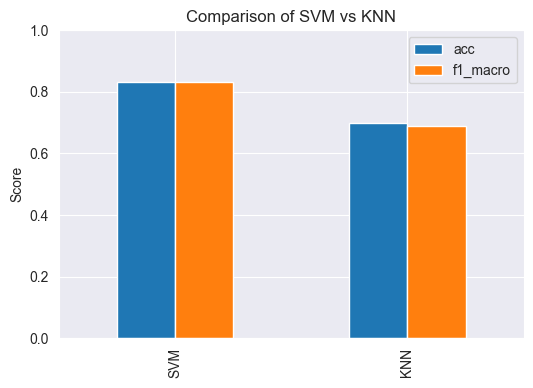

In [18]:
# === SVM ===
y_pred_svm = grid.predict(Xva_h)
m_svm = DU.metrics(yva, y_pred_svm)
print(f"SVM VAL: acc={m_svm['acc']:.4f}  f1_macro={m_svm['f1_macro']:.4f}")
print(m_svm['report'])

# === KNN ===
knn = make_pipeline(StandardScaler(with_mean=False), KNeighborsClassifier(n_neighbors=5))
knn.fit(Xtr_h, ytr)
y_pred_knn = knn.predict(Xva_h)
m_knn = DU.metrics(yva, y_pred_knn)
print(f"KNN VAL: acc={m_knn['acc']:.4f}  f1_macro={m_knn['f1_macro']:.4f}")
print(m_knn['report'])
results = {
    "SVM": {"acc": m_svm["acc"], "f1_macro": m_svm["f1_macro"]},
    "KNN": {"acc": m_knn["acc"], "f1_macro": m_knn["f1_macro"]},
}

df_res = pd.DataFrame(results).T

df_res.plot(kind="bar", figsize=(6,4))
plt.title("Comparison of SVM vs KNN")
plt.ylabel("Score")
plt.ylim(0,1)
plt.show()